In [2]:
import numpy as np     
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import random

In [5]:
import umap
import hdbscan

In [6]:
import joblib
from joblib import Parallel, delayed

In [7]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [8]:
from scipy import signal

# Load the results

In [9]:
df_results = pd.read_hdf('../../results/UMAP_HDBSCANclustering_29072023_1832.h5', key='features_with_results')

In [10]:
df_results.columns

Index(['len_NT_to_TT', 'len_sum_of_parts', 'len_mean_of_parts', 'curv_NT',
       'curv_DH1', 'curv_DH2', 'curv_DNP', 'curv_DTP1', 'curv_DTP2',
       'curv_DTP3', 'curv_DTP4', 'curv_DTP5', 'curv_DTP6', 'curv_DTP7',
       'curv_DTP8', 'curv_DTP9', 'curv_DTP10', 'curv_TT', 'quirkiness',
       'speed_NT', 'speed_DH1', 'speed_DH2', 'speed_DNP', 'speed_DTP1',
       'speed_DTP2', 'speed_DTP3', 'speed_DTP4', 'speed_DTP5', 'speed_DTP6',
       'speed_DTP7', 'speed_DTP8', 'speed_DTP9', 'speed_DTP10', 'speed_TT',
       'speed_VTP10', 'speed_VTP9', 'speed_VTP8', 'speed_VTP7', 'speed_VTP6',
       'speed_VTP5', 'speed_VTP4', 'speed_VTP3', 'speed_VTP2', 'speed_VTP1',
       'speed_VNP', 'speed_MOUTH', 'MOUTH', 'filename', 'frame',
       'path_to_video', 'filename_video', 'date', 'time', 'light', 'drugs',
       'duration', 'age', 'stim_on', 'stim_off', 'stim_RGB', 'dlc_result_file',
       'umap_raw_0', 'umap_raw_1', 'hdbscan', 'hdbscan_plus', 'hdbscan_plus_'],
      dtype='object')

# How can we use curvatures ?

In [11]:
df_curv = df_results.filter(like='curv')
df_curv

,curv_NT,curv_DH1,curv_DH2,curv_DNP,curv_DTP1,curv_DTP2,curv_DTP3,curv_DTP4,curv_DTP5,curv_DTP6,curv_DTP7,curv_DTP8,curv_DTP9,curv_DTP10,curv_TT
0,0.002747,0.008599,0.005984,0.004895,0.002223,0.006569,-0.008459,-0.010480,-0.006888,-0.010343,-0.024933,-0.030188,-0.036554,-0.031448,-0.071034
1,-0.006481,-0.003456,-0.006633,-0.015413,-0.023643,-0.007650,-0.006967,0.008229,0.010637,0.018073,0.011764,0.006470,0.006388,0.011760,-0.000803
2,-0.003500,-0.003287,-0.003524,-0.006942,-0.010419,-0.042153,-0.027122,0.047623,0.013930,0.013006,0.008609,0.005646,0.004973,-0.001866,-0.040519
3,-0.010190,-0.009334,-0.010965,-0.018913,-0.025498,-0.025259,-0.017712,0.014347,0.019458,0.025496,0.016694,0.008250,0.004628,-0.004616,-0.047098
4,-0.011177,-0.007488,-0.009124,-0.016018,-0.022658,-0.022512,-0.024905,0.011361,0.018592,0.025907,0.016419,0.006519,0.001429,-0.008186,-0.043898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3711897,0.010345,0.017362,0.014184,0.038669,0.056186,0.027271,-0.024896,-0.038514,-0.023725,-0.024699,-0.028830,-0.021063,-0.015412,-0.040983,-0.080980
3711898,0.008746,0.019519,0.013655,0.036920,0.051724,0.034991,-0.026251,-0.027656,-0.020300,-0.022471,-0.027675,-0.021445,-0.023672,-0.027922,-0.043409
3711899,0.013504,0.019257,0.020160,0.034481,0.039688,0.021282,-0.028214,-0.044448,-0.032844,-0.022440,-0.016729,-0.009527,-0.010283,-0.007077,-0.013765
3711900,0.011383,0.019187,0.020408,0.031806,0.043573,0.020646,-0.025526,-0.019540,-0.027306,-0.032448,-0.036025,-0.031162,-0.030082,-0.058997,-0.097764


## Try PCA ~ akin to eigen amphis

In [12]:
pca = PCA()
pca_curv = pca.fit_transform(df_curv)

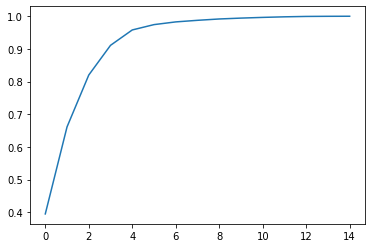

In [13]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [14]:
pca_curv.shape

(1940535, 15)

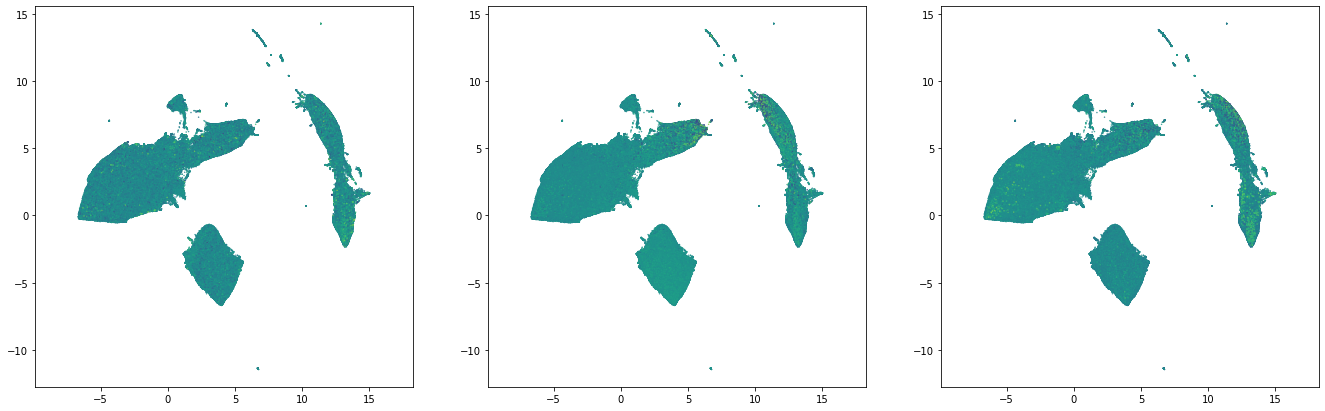

In [15]:
fig, axes = plt.subplots(1,3, figsize=(23,7))
axes= axes.ravel()
for i, ax in enumerate(axes):
    ax.scatter(df_results['umap_raw_0'],df_results['umap_raw_1'], s=0.2, c=pca_curv[:,i])
    ax.set_aspect('equal', 'datalim')

### Wavelets

In [15]:
fs = 30
omg0 = 6
fs_ny = fs/2

In [16]:
# 30 scales linearly spaced, max being sampling frequency  + 1

f_channels = np.arange(1, fs +1, 1)
# f_channels = np.arange(1, fs +1, 1)
widths = omg0*fs / (2*f_channels*np.pi) 

print(f_channels, len(widths))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30] 30


In [17]:
def wv_transform(df, widths, omg0):
    
    df_wv = pd.DataFrame()
    df_wv['filename'] = df['filename']
    df_wv['frames'] = df['frame']
    
    df.drop(['filename', 'frame'], axis=1, inplace = True)


    for feat in list(df.columns):


        ts = df[feat].values
        cwtm = signal.cwt(ts, signal.morlet2, widths, w = omg0)

        wv_feat = np.abs(cwtm)
        
        for f in range(len(widths)):
            df_wv[f'{feat}_wv{f}'] = wv_feat[f-1,:]
    
    return df_wv

In [18]:
for i in range(5):
    df_results[f'pca_{i}'] = pca_curv[:,i]

In [19]:
df_files = df_results.groupby(by = 'filename')

In [20]:
df_tsne_exps = []
for name, group in df_files:
    df_tsne_exps.append(group)

In [21]:
feats_list = ['pca_0', 'pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5']
df_feats_selected = []
for df in df_tsne_exps:
    df_feats_selected.append(df.filter(items = feats_list + ['filename', 'frame']))

In [22]:
df_wv_transforms = Parallel(n_jobs=40, verbose = 5)(delayed(wv_transform)(df, widths, omg0) 
                                                for df in df_feats_selected)


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame,

/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: Perfo

/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
 frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipy

/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: Perfo

/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: Perfo

/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: Perfo

/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: Perfo

/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: Perfo

/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: Perfo

/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: Perfo

/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: Perfo

/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: Perfo

/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: Perfo

/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: Perfo

/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: Perfo

/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: Perfo

/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: Perfo

/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: Perfo

/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: Perfo

/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: Perfo

/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: Perfo

/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: Perfo

[Parallel(n_jobs=40)]: Done 219 out of 219 | elapsed:    6.9s finished


In [23]:
df_wv_combined = pd.concat(df_wv_transforms)

In [1]:
len(df_wv_transforms)

NameError: name 'df_wv_transforms' is not defined

In [25]:
len(df_wv_combined.index)

1940535

/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: Perfo

/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: Perfo

/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: Perfo

/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: Perfo

/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: Perfo

/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: Perfo

/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: Perfo

/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: Perfo

/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: Perfo

/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_4002305/2015577146.py:19: Perfo

# umap on wavelets

In [26]:
reducer = umap.UMAP(min_dist=0.0, n_jobs=40)

In [28]:
embedding = reducer.fit_transform(df_wv_combined.filter(like='wv').values)
embedding.shape

(1940535, 2)

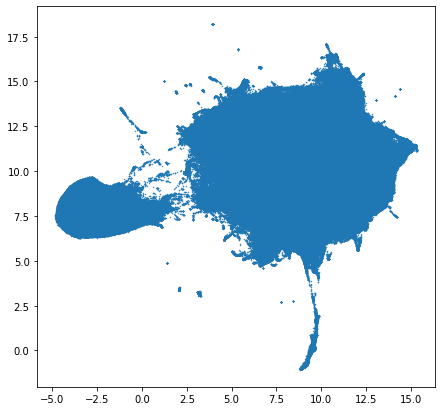

In [33]:
fig, axes = plt.subplots(1,1, figsize=(15,7))
axes.scatter(embedding[:, 0],embedding[:, 1], s=0.2)
axes.set_aspect('equal')

# tsne on wavelets

In [36]:
# from openTSNE import TSNEEmbedding, affinity, initialization
# from openTSNE import initialization

In [ ]:
reducer_tsne = TSNE(n_components=2, perplexity=500, n_jobs=40)
embedding_tsne = reducer_tsne.fit_transform(df_wv_combined.filter(like='wv').values)

/share/python-virtual-environments/vame0_1/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/share/python-virtual-environments/vame0_1/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


# Recluster using umap speeds and umap/tsne curvatures

In [ ]:
1 + 2